In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('/Users/annafurgala-wojas/New project/Heart-disease-dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [5]:
data.groupby("stroke")["bmi"].apply(lambda x: x.isna().sum())

stroke
0    161
1     40
Name: bmi, dtype: int64

In [6]:
print(data.duplicated().sum())

0


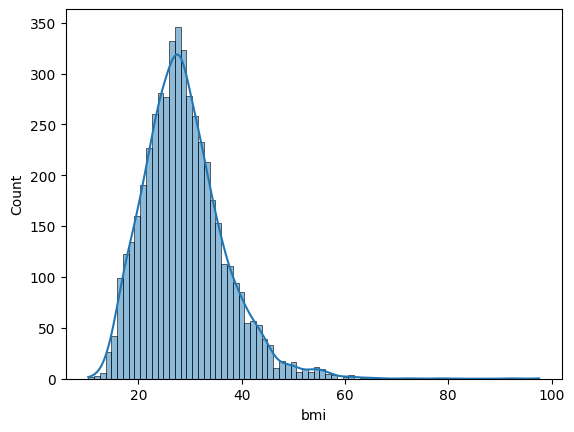

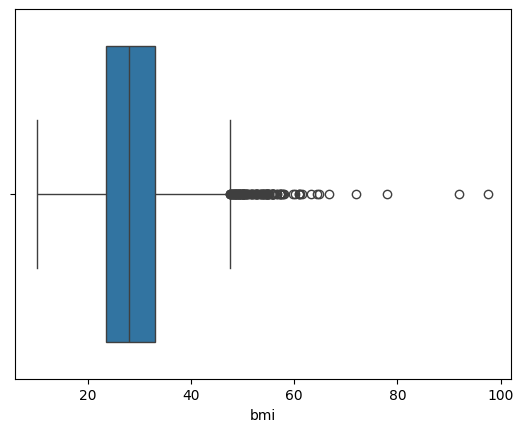

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data["bmi"].dropna(), kde=True) 
plt.show()

sns.boxplot(x=data["bmi"])  
plt.show()

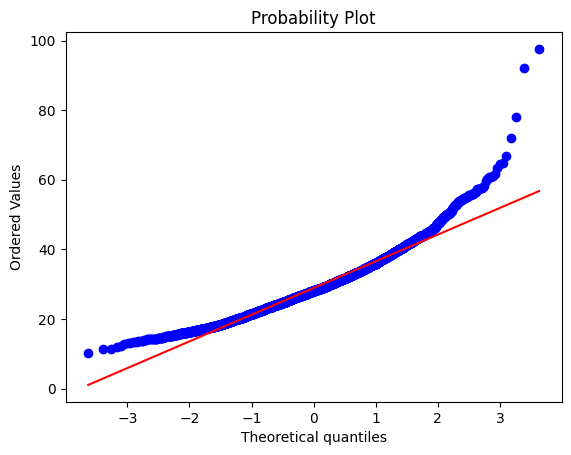

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(data["bmi"].dropna(), dist="norm", plot=plt)
plt.show()

In [9]:
from scipy.stats import shapiro

stat, p = shapiro(data["bmi"].dropna())
print("Statistic =", stat, "p-value =", p)


Statistic = 0.9535468320743543 p-value = 6.61587660022628e-37


In [10]:
print("Skewness:", data["bmi"].skew())
print("Kurtosis:", data["bmi"].kurt())

Skewness: 1.0553402052962912
Kurtosis: 3.3626591656236746


In [11]:
data["bmi"] = data.groupby("stroke")["bmi"].transform(
    lambda x: x.fillna(x.median())
)

In [12]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.871409,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699951,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.000000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [15]:
data = data.drop(columns=["id"])

In [16]:
heart_dis = data["stroke"].value_counts()
print(heart_dis)

stroke
0    4861
1     249
Name: count, dtype: int64


In [17]:


data_final = pd.get_dummies(data, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], dtype=int)

data_final.head()



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,29.7,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [18]:
heart_dis = data_final["stroke"].value_counts()
print(heart_dis)

stroke
0    4861
1     249
Name: count, dtype: int64


In [19]:
X = data_final.drop(columns=["stroke"])

y = data_final['stroke']


In [38]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators=100, 
    criterion='entropy', 
    random_state=0,
    class_weight='balanced' 
)
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred3 = classifier.predict(X_test)
accuracy_score(y_test, y_pred3)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [46]:
from xgboost import XGBClassifier
neg = sum(y_train == 0)
pos = sum(y_train == 1)

scale_pos_weight = neg / pos
classifier1 = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight  # waga klasy 1
)

classifier1.fit(X_train, y_train)

/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:24:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred4 = classifier1.predict(X_test)
accuracy_score(y_test, y_pred4)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



Undersampling..

In [47]:
import pandas as pd
from sklearn.utils import resample



df_majority = data_final[data_final.stroke == 0]
df_minority = data_final[data_final.stroke == 1]


df_majority_downsampled = resample(
    df_majority, 
    replace=False,    # bez powtórzeń
    n_samples=len(df_minority),  # liczba próbek taka jak w klasie mniejszościowej
    random_state=42
)

# Połącz ponownie klasy
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Opcjonalnie: tasowanie danych
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['stroke'].value_counts())

stroke
1    249
0    249
Name: count, dtype: int64


In [48]:
X_under = df_balanced.drop(columns=["stroke"])

y_under = df_balanced['stroke']

In [ ]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_u= scaler.fit_transform(X_train_u)
X_test_u = scaler.transform(X_test_u)

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF_u = RandomForestClassifier(
    n_estimators=100, 
    criterion='entropy', 
    random_state=0,
    class_weight='balanced' 
)
classifier_RF_u.fit(X_train_u, y_train_u)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred_RF_u = classifier_RF_u.predict(X_test_u)
accuracy_score(y_test_u, y_pred_RF_u)
print(classification_report(y_test_u,y_pred_RF_u))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        57
           1       0.69      0.88      0.78        43

    accuracy                           0.78       100
   macro avg       0.79      0.79      0.78       100
weighted avg       0.80      0.78      0.78       100



In [52]:
from xgboost import XGBClassifier
neg = sum(y_train_u == 0)
pos = sum(y_train_u == 1)

scale_pos_weight = neg / pos
classifier_XG_U = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight  
)

classifier_XG_U.fit(X_train_u, y_train_u)

/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:36:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred_XG_u = classifier_XG_U.predict(X_test_u)
accuracy_score(y_test_u, y_pred_XG_u)
print(classification_report(y_test_u,y_pred_XG_u))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        57
           1       0.66      0.63      0.64        43

    accuracy                           0.70       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.70      0.70      0.70       100



SMOTE + undersampling hybrydowy

In [54]:
X = data_final.drop(columns=["stroke"])

y = data_final['stroke']

In [55]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

smote = SMOTE(sampling_strategy=0.5, random_state=42)  
X_smote, y_smote = smote.fit_resample(X, y)

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

X_balanced, y_balanced = rus.fit_resample(X_smote, y_smote)

df_balanced = pd.concat([X_balanced, y_balanced], axis=1)
print(df_balanced['stroke'].value_counts())


stroke
0    2430
1    2430
Name: count, dtype: int64


/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [56]:
X_smote = df_balanced.drop('stroke', axis=1)
y_smote = df_balanced['stroke']

In [57]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_smote= scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF_smote = RandomForestClassifier(
    n_estimators=100, 
    criterion='entropy', 
    random_state=0,
    class_weight='balanced' 
)
classifier_RF_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred_RF_smote = classifier_RF_smote.predict(X_test_smote)
accuracy_score(y_test_smote, y_pred_RF_smote)
print(classification_report(y_test_smote,y_pred_RF_smote))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       489
           1       0.95      0.90      0.92       483

    accuracy                           0.93       972
   macro avg       0.93      0.93      0.93       972
weighted avg       0.93      0.93      0.93       972



In [60]:
from xgboost import XGBClassifier
neg = sum(y_train_smote == 0)
pos = sum(y_train_smote == 1)

scale_pos_weight = neg / pos
classifier_XG_smote = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight  
)

classifier_XG_smote.fit(X_train_smote, y_train_smote)

/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:45:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred_XG_smote = classifier_XG_smote.predict(X_test_smote)
accuracy_score(y_test_smote, y_pred_XG_smote)
print(classification_report(y_test_smote,y_pred_XG_smote))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       489
           1       0.95      0.90      0.93       483

    accuracy                           0.93       972
   macro avg       0.93      0.93      0.93       972
weighted avg       0.93      0.93      0.93       972



SMOTETomek

In [63]:
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = data_final.drop(columns=["stroke"])
y = data_final['stroke']

In [65]:
smt = SMOTETomek(sampling_strategy='auto', random_state=42)
X_res, y_res = smt.fit_resample(X, y)

print("The amount of samples SMOTETomek:")
print(pd.Series(y_res).value_counts())

The amount of samples SMOTETomek:
stroke
1    4821
0    4821
Name: count, dtype: int64


/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [66]:
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF_tomek = RandomForestClassifier(
    n_estimators=100, 
    criterion='entropy', 
    random_state=0,
    class_weight='balanced' 
)
classifier_RF_tomek.fit(X_train_tomek, y_train_tomek)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred_RF_tomek = classifier_RF_tomek.predict(X_test_tomek)
accuracy_score(y_test_tomek, y_pred_RF_tomek)
print(classification_report(y_test_tomek,y_pred_RF_tomek))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.99      0.97      0.98       964

    accuracy                           0.98      1929
   macro avg       0.98      0.98      0.98      1929
weighted avg       0.98      0.98      0.98      1929



In [69]:
from xgboost import XGBClassifier
neg = sum(y_train_tomek == 0)
pos = sum(y_train_tomek == 1)

scale_pos_weight = neg / pos
classifier_XG_tomek = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight  
)

classifier_XG_tomek.fit(X_train_tomek, y_train_tomek)

/Users/annafurgala-wojas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:54:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred_XG_tomek = classifier_XG_tomek.predict(X_test_tomek)
accuracy_score(y_test_tomek, y_pred_XG_tomek)
print(classification_report(y_test_tomek,y_pred_XG_tomek))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       965
           1       0.98      0.97      0.97       964

    accuracy                           0.97      1929
   macro avg       0.97      0.97      0.97      1929
weighted avg       0.97      0.97      0.97      1929

